In [46]:
#for pandas
import pandas as pd

In [47]:
#for numpy
import numpy as np

In [48]:
#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
def gz(theta,x):
    hey=x.dot(theta)
    hey=1/(1+np.exp(-hey))
    return hey

In [51]:
def compute_cost(theta,x,y,lambo=0):
    hey=gz(theta,x)
    m=x.shape[0]
    cost=(1/m)*np.sum(((-y)*np.log(hey))-((1-y)*np.log(1-hey)))
    cost=cost+(lambo/m)*np.sum(theta*theta)
    return cost

In [52]:
def feature_normalize_own(x):
    m=x.shape[0]
    mu=(1/m)*np.sum(x,axis=0)
    sig=np.std(x,axis=0,ddof=1)
    mu[0]=0
    sig[0]=1
    x=(x-mu)/sig
    return x,mu,sig

In [53]:
def feature_normalize_other(x,mu,sig):
    x=(x-mu)/sig
    return x

In [54]:
def compute_grad(theta,x,y,lambo=0):
    hey=gz(theta,x)
    m=x.shape[0]
    grad=(1/m)*(np.transpose(x).dot(hey-y))
    grad[1:]=grad[1:]+(lambo/m)*(theta[1:])
    return grad

In [55]:
def accuracy(theta,x,y,ep):
    hey=gz(theta,x)
    m=x.shape[0]
    hey=(hey>ep).reshape(-1,1).astype(int)
    hey=np.sum(hey==y)
    hey=hey/m
    return hey

In [56]:
def test_acc_submit(theta,x,ep):
    hey=gz(theta,x)
    hey=(hey>ep).reshape(-1,1).astype(int)
    return hey

In [57]:
def submitsol(x,theta,ep,filenametobesaved):
    out=test_acc_submit(theta,x,ep)
    out=np.hstack((np.arange(1,(x.shape[0])+1,1).reshape(-1,1),out))
    filenametobesaved=filenametobesaved+".csv"
    np.savetxt(filenametobesaved,out,header="Id,Solution",delimiter=",")

In [58]:
datafileloc="C:/Users/Ritik/Desktop/Projects_Flash/London/train.csv"

In [59]:
datatrainin=pd.read_csv(datafileloc,header=None)

In [60]:
datatrainin.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [61]:
datatrainin.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [62]:
datatrainin.isnull().sum().sum()

0

In [63]:
datatrainin.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
dtype: object

So there are no null values in whole training input dataset

In [64]:
datafileloc="C:/Users/Ritik/Desktop/Projects_Flash/London/trainLabels.csv"

In [65]:
datatrainlab=pd.read_csv(datafileloc,header=None)

In [66]:
datatrainlab.isnull().sum().sum()

0

So training set label also do not contain any blank cells

Now randomly shuffling cells row-wise and then seperate it into train and validation set in ratio of 70 is to 30

In [67]:
random_index=np.arange(0,1000,1)
np.random.shuffle(random_index)

In [68]:
datatrainin=datatrainin.iloc[random_index,:]
datatrainlab=datatrainlab.iloc[random_index,:]
xtrain=np.array(datatrainin.iloc[:700,:])
ytrain=np.array(datatrainlab.iloc[:700,:])
xval=np.array(datatrainin.iloc[700:,:])
yval=np.array(datatrainlab.iloc[700:,:])
print(xtrain.shape,ytrain.shape)
print(xval.shape,yval.shape)

(700, 40) (700, 1)
(300, 40) (300, 1)


In [69]:
#adding bias column in beginning
xtrain=np.hstack((np.ones(xtrain.shape[0]).reshape(-1,1),xtrain))
xval=np.hstack((np.ones(xval.shape[0]).reshape(-1,1),xval))

In [70]:
datafileloc="C:/Users/Ritik/Desktop/Projects_Flash/London/test.csv"

In [71]:
datatest=pd.read_csv(datafileloc,header=None)

In [72]:
datatest.isnull().sum().sum()

0

This also do not contain any null value

In [73]:
xtest=np.array(datatest)
xtest=np.hstack((np.ones(xtest.shape[0]).reshape(-1,1),xtest))
print(xtrain.shape)

(700, 41)


Lets begin by checking value of learning rate(just a trial run to check working of functions)

In [74]:
iterations=5000
alpha=0.1
ite=[i for i in range(0,iterations+1)]
theta=np.zeros(xtrain.shape[1]).reshape(-1,1)
J_val=[compute_cost(theta,xtrain,ytrain)]
xtrain_one,mu_one,sig_one=feature_normalize_own(xtrain)

In [75]:
for i in range(0,iterations):
    theta=theta-alpha*(compute_grad(theta,xtrain_one,ytrain))
    J_val.append(compute_cost(theta,xtrain_one,ytrain))

Text(0,0.5,'Error(In sample)')

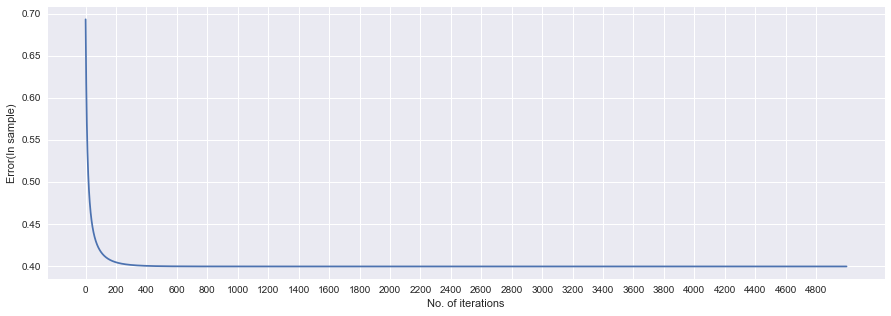

In [76]:
sns.set()
plt.figure(figsize=(15,5))
plt.plot(ite,J_val)
plt.xticks(np.arange(0,5000,200))
plt.xlabel("No. of iterations")
plt.ylabel("Error(In sample)")

In [77]:
print(J_val[-1])

0.3993370966904685


Now lets try different learning rates

In [78]:
alphaset=np.arange(0.1,10,0.1)
iterations=5000
J_val=[]

In [79]:
for alpha in alphaset:
    theta=np.zeros(xtrain_one.shape[1]).reshape(-1,1)
    for i in range(0,iterations):
      theta=theta-alpha*(compute_grad(theta,xtrain_one,ytrain))
    J_val.append(compute_cost(theta,xtrain_one,ytrain))

Text(0,0.5,'Error')

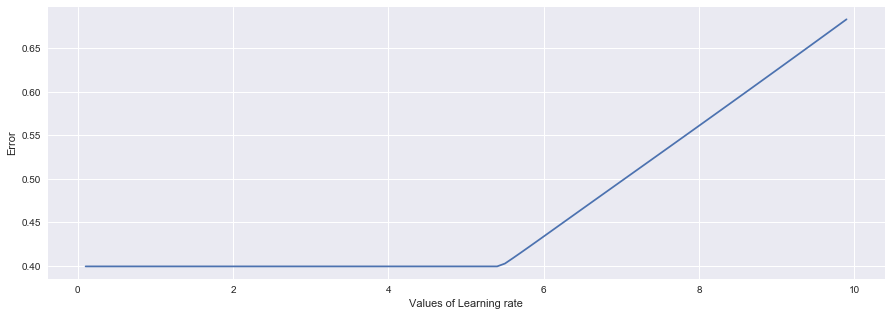

In [80]:
plt.figure(figsize=(15,5))
plt.plot(alphaset,J_val)
#plt.xticks(np.arange(0.01,3,0.1))
plt.xlabel("Values of Learning rate")
plt.ylabel("Error")


In [81]:
# I think we can take learning rate to be 0.1 and iterations to be 600

Now lets plot learning curves w.r.t Number of training examples

In [82]:
mset=[i for i in range(1,(xtrain.shape[0]+1))]
iterations=600
alpha=0.1
J_val_train=[]
J_val_val=[]
xtrain_one,mu_one,sig_one=feature_normalize_own(xtrain)
xval_one=feature_normalize_other(xval,mu_one,sig_one)

In [83]:
for m in mset:
    theta=np.zeros(xtrain_one.shape[1]).reshape(-1,1)
    for i in range(0,iterations):
        theta=theta-alpha*(compute_grad(theta,xtrain_one[0:m,:],ytrain[0:m]))
    J_val_train.append(compute_cost(theta,xtrain_one[0:m,:],ytrain[0:m]))
    J_val_val.append(compute_cost(theta,xval_one,yval))

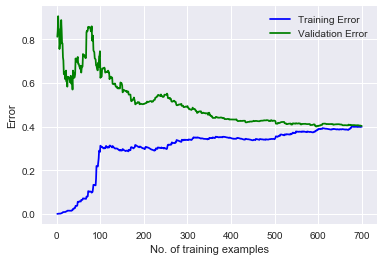

In [84]:
plt.plot(mset,J_val_train,c='b')
plt.plot(mset,J_val_val,c='g')
plt.xlabel("No. of training examples")
plt.ylabel("Error")
plt.legend(["Training Error","Validation Error"])

In [85]:
print(J_val_train[-1],J_val_val[-1])

0.3994649020922803 0.4037642439684871


Now clearly this is case of underfitting or say high bias...so lets try with higher degree polynomials

In [86]:
degset=[1,2,3]
iteration=600
alpha=0.1
J_val_val_deg=[]
J_val_train_deg=[]

In [87]:
for deg in degset:
    poly=PolynomialFeatures(degree=deg,include_bias=True,interaction_only=False)
    xtrain_poly=poly.fit_transform(xtrain[:,1:])
    xval_poly=poly.fit_transform(xval[:,1:])
    xtrain_polyone,mu_polyone,sig_polyone=feature_normalize_own(xtrain_poly)
    xval_polyone=feature_normalize_other(xval_poly,mu_polyone,sig_polyone)
    theta=np.zeros(xtrain_polyone.shape[1]).reshape(-1,1)
    for i in range(0,iteration):
        theta=theta-alpha*(compute_grad(theta,xtrain_polyone,ytrain))
    J_val_train_deg.append(compute_cost(theta,xtrain_polyone,ytrain))
    J_val_val_deg.append(compute_cost(theta,xval_polyone,yval))

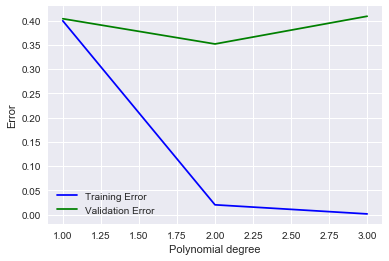

In [88]:
plt.plot(degset,J_val_train_deg,c='blue')
plt.plot(degset,J_val_val_deg,c='g')
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend(["Training Error","Validation Error"])

So lets try different lambda values with degree 2 and 3 and then select best error on validation set

In [104]:
minerr=1000     #(random initializations)
deg_opt=10      #(random initializations)
labmo_opt=500   #(random initializations)
theta_opt=-1
degset=[2]
iteration=600
alpha=0.1
lamboset=np.arange(0,100,1)
J_val_val_2lambda=[]
J_val_train_2lambda=[]
theta=np.zeros(xtrain_polyone.shape[1]).reshape(-1,1)

In [105]:
for deg in degset:
    poly=PolynomialFeatures(degree=deg,include_bias=True,interaction_only=False)
    xtrain_poly=poly.fit_transform(xtrain[:,1:])
    xval_poly=poly.fit_transform(xval[:,1:])
    xtrain_polyone,mu_polyone,sig_polyone=feature_normalize_own(xtrain_poly)
    xval_polyone=feature_normalize_other(xval_poly,mu_polyone,sig_polyone)
    for lam in lamboset:
      theta=np.zeros(xtrain_polyone.shape[1]).reshape(-1,1)
      for i in range(0,iteration):
        theta=theta-alpha*(compute_grad(theta,xtrain_polyone,ytrain,lam))
      J_val_train_2lambda.append(compute_cost(theta,xtrain_polyone,ytrain))
      J_val_val_2lambda.append(compute_cost(theta,xval_polyone,yval))
      if J_val_val_2lambda[-1]<minerr:
          minerr=J_val_val_2lambda[-1]
          deg_opt=2
          lambo_opt=lam
          theta_opt=theta

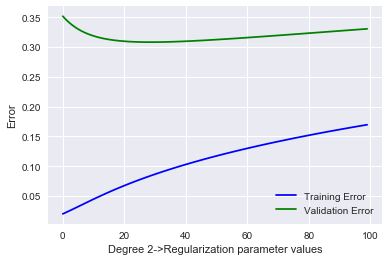

In [107]:
plt.xlabel("Degree 2->Regularization parameter values")
plt.ylabel("Error")
plt.plot(lamboset,J_val_train_2lambda,c='b')
plt.plot(lamboset,J_val_val_2lambda,c='g')
plt.legend(["Training Error","Validation Error"])

In [108]:
print(deg_opt,lambo_opt,minerr)

2 29 0.30820932921491534


So we select degree of polynomial to be 2 and theta=theta_opt and regularization parameter value to be lambo_opt

In [109]:
poly=PolynomialFeatures(degree=2,include_bias=True,interaction_only=False)
xtrain_poly=poly.fit_transform(xtrain[:,1:])
xval_poly=poly.fit_transform(xval[:,1:])
xtest_poly=poly.fit_transform(xtest[:,1:])
xtrain_polyone,mu_polyone,sig_polyone=feature_normalize_own(xtrain_poly)
xval_polyone=feature_normalize_other(xval_poly,mu_polyone,sig_polyone)
xtest_polyone=feature_normalize_other(xtest_poly,mu_polyone,sig_polyone)
theta_final_almost=theta_opt

Now lets select threshold value or cut-off value

In [110]:
epsilonset=np.arange(0.01,1,0.01)
J_acc=[]

In [111]:
for ep in epsilonset:
    J_acc.append(accuracy(theta_final_almost,xtrain_polyone,ytrain,ep))

Text(0,0.5,'Accuracy')

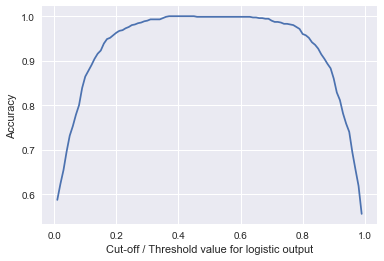

In [112]:
plt.plot(epsilonset,J_acc)
plt.xlabel("Cut-off / Threshold value for logistic output")
plt.ylabel("Accuracy")

In [113]:
epsilon_opt=epsilonset[np.argmax(J_acc)]
accuracy_best=J_acc[np.argmax(J_acc)]
print(epsilon_opt,accuracy_best)

0.37 1.0


In [114]:
#now as we can see epsilon between 0.4 to 0.6 gives same accuracy so we submit 3 solutions with these 3 cut offs
submitsol(xtest_polyone,theta_final_almost,0.4,"Logistic_sol_1")
submitsol(xtest_polyone,theta_final_almost,0.5,"Logistic_sol_2")
submitsol(xtest_polyone,theta_final_almost,0.6,"Logistic_sol_3")

Now lets add validation to training set and again calculate theta

In [119]:
xtrain_two=np.array(datatrainin)
print(xtrain_two.shape)
ytrain=np.array(datatrainlab)
print(ytrain.shape)

(1000, 40)
(1000, 1)


In [120]:
alpha=0.1
iterations=600

In [121]:
poly=PolynomialFeatures(degree=2,include_bias=True,interaction_only=False)
xtrain_two=poly.fit_transform(xtrain_two)
xtest_two=poly.fit_transform(xtest[:,1:])
xtrain_two,mu_two,sig_two=feature_normalize_own(xtrain_two)
xtest_two=feature_normalize_other(xtest_two,mu_two,sig_two)

In [122]:
theta=np.zeros(xtrain_two.shape[1]).reshape(-1,1)
for i in range(0,iterations):
    theta=theta-alpha*(compute_grad(theta,xtrain_two,ytrain,lambo_opt))
submitsol(xtest_two,theta,epsilon_opt,"Logistic_sol_4")

In [123]:
#just one more with more number of iterations
iterations=5000
theta=np.zeros(xtrain_two.shape[1]).reshape(-1,1)
for i in range(0,iterations):
    theta=theta-alpha*(compute_grad(theta,xtrain_two,ytrain,lambo_opt))
submitsol(xtest_two,theta,epsilon_opt,"Logistic_sol_5")